# Generatore Monte Carlo di raggi cosmici

La distribuzione angolare dei raggi cosmici che raggiungono il suolo terresrre segue approssimativamente la legge $\mathrm{d}P(\theta,\phi)/\mathrm{d}\Omega = k \cos^2\theta$ con $0\leq\theta<\pi/2$.

Il punto di impatto al suolo è uniformemente distribuito sulla superficie.

* Scrivere un generatore di raggi cosmici distribuiti secondo questo modello.
* Graficarne la distribuzione del punto di impatto e della direzione di provenienza.
* Graficare un numero finito con l'utility di matplotlib [quiver](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html), che è pensata per visualizzare un campo vettoriale, ma noi la useremo in modo diverso

Opzionale:

* Definire la geometria di un semplice telescopio, ad es.: fatto da due piani quadrati orizzontali posti ad una certa altezza tra di loro
* Calcolare le intersezioni con i due piani di rivelatore dei raggi cosmici generati aventi punto di impatto sul piano di base
* Calcolare l'accettanza geometrica del telescopio rispetto ai raggi cosmici che arrivano al rivelatore di base

## Distribuzione angolare

La prima cosa da fere è generare punti in due dimensioni, $(\theta, \phi)$, tali che i punti siani distribuiti secondo la legge:

$\displaystyle \frac{\mathrm{d}P}{\mathrm{d}\Omega} = \frac{\mathrm{d}P}{\sin\theta\mathrm{d}\theta\,\mathrm{d}\phi} = k \cos^2\theta$ 

dove $k$ è una costante di normalizzazione e $0\le \theta <\pi/2$
Possiamo anche riscrivere:

$\displaystyle\frac{\mathrm{d}P}{\mathrm{d}\theta\,\mathrm{d}\phi}=f(\theta)\,g(\phi)= k\sin\theta\cos^2\theta$ 

Dove:

$f(\theta)=c_1\sin \theta\cos^2\theta$

$g(\phi) = c_2$

e $k=c_1 c_2$.

La distribuzione cumulativa di $f(\theta)$ è:

$\displaystyle F(\theta) = c_1 \int_{0}^\theta \sin \theta^\prime\cos^2\theta^\prime\,\mathrm{d}\theta^\prime = 
-\frac{c_1}{3}\left[\cos^3\theta^\prime\right]_{\theta^\prime=0}^{\theta^\prime=\theta} = 
\frac{c_1}{3}(1 - \cos^3\theta)$

Il coefficiente di normalizzazionre $c_1$ va posto in modo che sia $F(\pi/2) = 1$:

$\displaystyle 1 = \frac{c_1}{3}\left(1 - \cos^3 \frac{\pi}{2}\right) = \frac{c_1}{3}$

Quindi $c_1 = 3$ e $F(\theta) = 1 - \cos^3\theta$.

$F(\theta)$ va invertita per otterenere $\theta$ dall'equazione: $F(\theta)= r_1$, dove $r_1$ è un numero uniormemente distribuito in $[0,1\,[$:


$\displaystyle 1 - \cos^3\theta = r_1$

Da cui:


$\displaystyle\theta = \mathrm{arccos}(\sqrt[3]{1-r_1})\in \left[0, \frac{\pi}{2}\right[$

Considerando che la distribuzione di $1-r_1$ è la stessa di $r_1$, potremmo anche scrivere:

$\displaystyle\theta = \mathrm{arccos}(\sqrt[3]{r_1})\in \left] 0, \frac{\pi}{2}\right]$

Ma escluderemmo il valore $\theta=0$, che altrimenti avrebbe probabilità molto piccola, ma non nulla, di essere estratto, considerando che i valori estratti sono discretizzati in base alla precisione numerica della macchina.

L'angolo $\phi$, come di consueto, si può generare unifrmemente tra $0$ e $2\pi$ a partire da un numero $r_2$ distribuito uniformemente in $[0,1\,[$:
$\phi = 2\pi r_2\in [0, 2\pi\,[$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 5000000
th, ph = np.arccos((1 - np.random.uniform(size=n))**(1/3)), 2*math.pi*np.random.uniform(size=n)
st, ct = np.sin(th), np.cos(th)
sp, cp = np.sin(ph), np.cos(ph)
us, vs, ws = st*cp, st*sp, ct

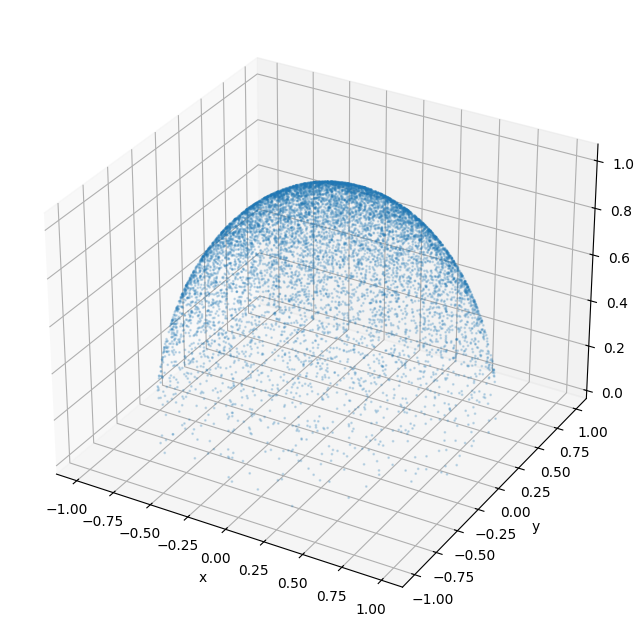

In [3]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
nmax = 10000
ax.scatter(us[:nmax], vs[:nmax], ws[:nmax], marker='o', s=1, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.show()

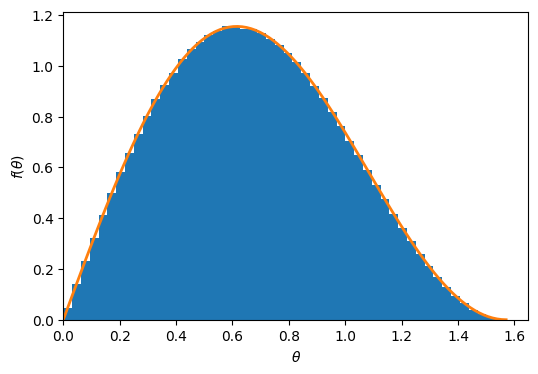

In [4]:
plt.figure(figsize = (6, 4))
plt.hist(th, density=True, bins = 50)
xpts = np.linspace(0, math.pi/2, 100)
ypts = 3*np.sin(xpts)*np.cos(xpts)**2
plt.plot(xpts, ypts, linewidth=2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.xlim(0)
plt.show()

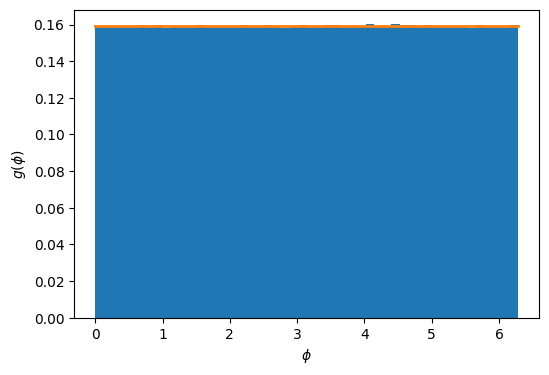

In [5]:
plt.figure(figsize=(6, 4))
plt.hist(ph, density=True, bins=50)
xpts = np.linspace(0, 2*math.pi, 100)
ypts = [0.5/math.pi]*len(xpts)
plt.plot(xpts, ypts, linewidth=2)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$g(\phi)$')
plt.show()

## Distribuzione dei punti di impatto

I punti di impatto vanno semplicemente generati uniformemente nella superficie che si vuole considerare. Tipicamente, questa è determinata dalla geometria del rivelatore di interesse.

Consideriamo un piano di $1\mathrm{m}\times 1\mathrm{m}$.

In [6]:
x0s = np.random.uniform(size=n) - 0.5
y0s = np.random.uniform(size=n) - 0.5
z0s = np.zeros(n)

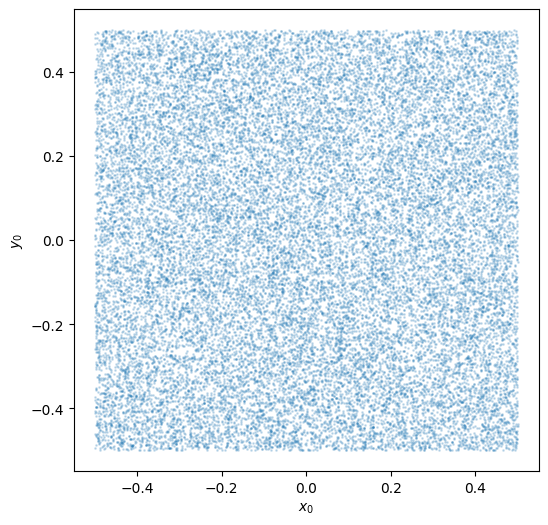

In [7]:
plt.figure(figsize=(6, 6))
nmax = 30000
plt.scatter(x0s[:nmax], y0s[:nmax], s=1, alpha=0.2)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$y_0$')
plt.show()

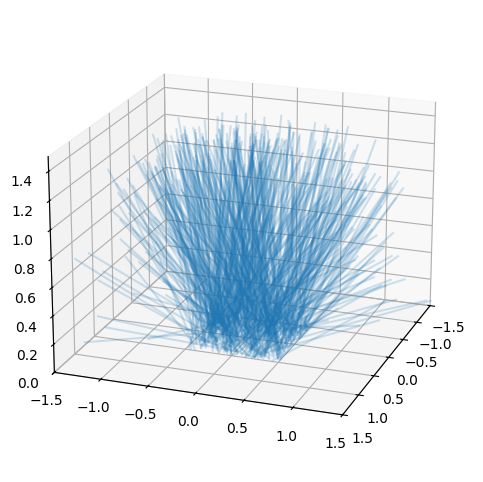

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
nmax = 500
ax.quiver(x0s[:nmax], y0s[:nmax], z0s[:nmax], us[:nmax], vs[:nmax], ws[:nmax],
          arrow_length_ratio=0, length=1.5, alpha=0.2)
ax.set_xlim3d(-1.5, 1.5)
ax.set_ylim3d(-1.5, 1.5)
ax.set_zlim3d(0, 1.5)
plt.show()

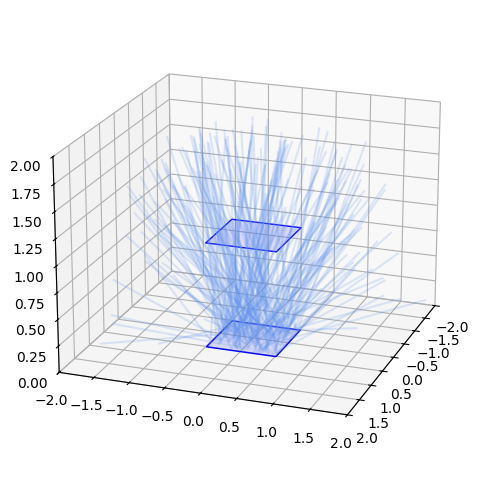

In [9]:
import mpl_toolkits.mplot3d as a3
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
nmax = 200
ax.quiver(x0s[:nmax], y0s[:nmax], z0s[:nmax], us[:nmax], vs[:nmax], ws[:nmax], length=2, arrow_length_ratio=0,
            color='cornflowerblue', alpha=0.2)
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(0,2)
plane_vtx = np.array([[-0.5, -0.5, 0], [0.5, -0.5, 0], [0.5, 0.5, 0], [-0.5, 0.5, 0]])
plane0 = a3.art3d.Poly3DCollection([plane_vtx], closed=True)
plane0.set_color('#0000ff20')
plane0.set_edgecolor('#0000ff')
ax.add_collection3d(plane0)
plane_h = 1
plane1 = a3.art3d.Poly3DCollection([plane_vtx + [0, 0, plane_h]], closed=True)
plane1.set_color('#0000ff20')
plane1.set_edgecolor('#0000ff')
ax.add_collection3d(plane1)
plt.show()

Abbiamo generato i raggi cosmici in modo che passino per il piano a quota $z_0=0\mathrm{m}$. 

Per ogni raggio cosmico, dobbiamo calcolare l'intersezione con il piano superiore e verificare se è dentro o fuori rispetto al piano superiore.


Per ogni raggio cosmico, dobbiamo calcolare l'intersezione con il piano superiore e verificare che sia entro la geometria del piano.

Un punto sul raggio cosmico è stato parametrizzato come:

$\vec{r} = \vec{r_0} + s\, \hat{u}$.

Dove $\hat{u} = (u, v, w)$

Il punto di impatto sul piano a quota $h$ si trova risolvendo l'equazione:

$z = z_0 + s\, w = s\, w = h$

$l$ si ottiene semplicemente come:

$\displaystyle s = \frac{h}{w}$

Trovata $s$, dobbiamo verificare che il punto $\vec{r_0} + s\,\vec{u}$ abbia coordinate $x$ e $y$ entro il piano.


Quindi: 

$\displaystyle x_{\mathrm{min}} < {x_0} + \frac{h\, u}{w} < x_{\mathrm{max}}$

$\displaystyle y_{\mathrm{min}} < {y_0} + \frac{h\, v}{w} < y_{\mathrm{max}}$

In [10]:
x1s = x0s + plane_h*us/ws
y1s = y0s + plane_h*vs/ws
z1s = np.full(n, plane_h)
hits = (-0.5 < x1s) & (x1s < 0.5) & (-0.5 < y1s) & (y1s < 0.5)

In [11]:
colors = np.where(hits, 'red', 'cornflowerblue')

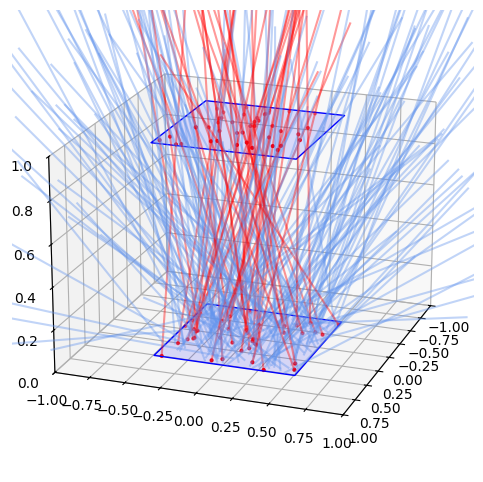

In [12]:
#%matplotlib notebook
import mpl_toolkits.mplot3d as a3
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
nmax = 200
x0max, y0max, z0max = x0s[:nmax], y0s[:nmax], z0s[:nmax]
x1max, y1max, z1max = x1s[:nmax], y1s[:nmax], z1s[:nmax]
umax, vmax, wmax = us[:nmax], vs[:nmax], ws[:nmax]
hitmax = hits[:nmax]
ax.quiver(x0max, y0max, z0max, umax, vmax, wmax, length=2, arrow_length_ratio=0,
          color=colors, alpha=0.4)
ax.scatter(x0max[hitmax], y0max[hitmax], z0max[hitmax], s=4, color='red')
ax.scatter(x1max[hitmax], y1max[hitmax], z1max[hitmax], s=4, color='red')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(0, 1)
plane_vtx=np.array([[-0.5, -0.5, 0], [0.5, -0.5, 0], [0.5, 0.5, 0], [-0.5, 0.5, 0]])
plane0 = a3.art3d.Poly3DCollection([plane_vtx])
plane0.set_color('#0000ff20')
plane0.set_edgecolor('#0000ff')
ax.add_collection3d(plane0)
plane1 = a3.art3d.Poly3DCollection([plane_vtx + [0, 0, plane_h]])
plane1.set_color('#0000ff20')
plane1.set_edgecolor('#0000ff')
ax.add_collection3d(plane1)
plt.show()

Grafichiamo la distribuzione angolare dei raggi cosmici che attraversano il rivelatore.
La distribuzione sarebbe difficilmente ottenibile per via analitica, e il Monte Carlo risulta una tecnica particolarmente vantaggiosa e flessibile in base alla configurazione del rivelatore.

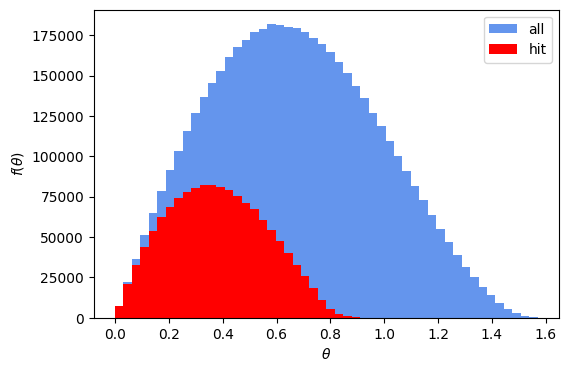

In [13]:
#%matplotlib inline
plt.figure(figsize=(6, 4))
theta_range=[0, math.pi/2]
plt.hist(th, density=False, bins=50, range=theta_range, color='cornflowerblue', label='all')
plt.hist(th[hits], density=False, bins=50, range=theta_range, color='red', label='hit')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.legend()
plt.show()

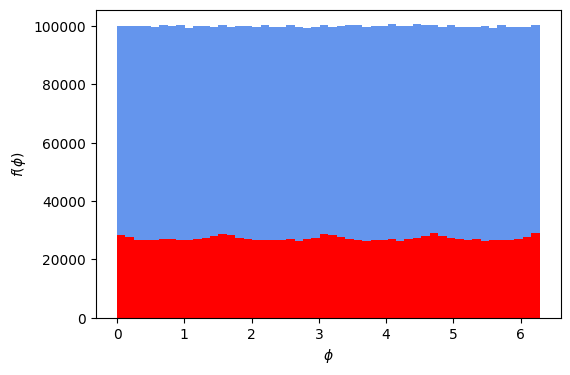

In [14]:
#%matplotlib inline
plt.figure(figsize=(6, 4))
theta_range=[0, 2*math.pi]
plt.hist(ph, density=False, bins=50, range=theta_range, color='cornflowerblue')
plt.hist(ph[hits], density=False, bins=50, range=theta_range, color='red')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$f(\phi)$')
plt.show()

Calcolo l'accettanza geometrica:

In [15]:
print("{:d}/{:d}".format(len(th[hits]), len(th)))
eff = float(len(th[hits]))/len(th)
err = math.sqrt(eff*(1 - eff)/len(th))
print("ε = {:.4f}±{:.4f}".format(eff, err))

1360360/5000000
ε = 0.2721±0.0002


# Radiografia muonica

Quanto abbiamo visto è la base per simulare una distribuzione di raggi cosmici che attraversa un rivelatore e consentono di stimare il flusso atteso di raggi cosmici in funzione della direzione.

Se il rivelatore è posto in una cavità ed è sovrastato da materiale (es.: roccia), questo assorbirà parte dei raggi cosmici. Un deficit rispetto al flusso atteso dalla simulazione permette di misurare l'assorbimento, quindi lo spessore di materiale.

In questo modo si possono identificare cavità in zone inaccessibili.

Questa tecnica prende il nome di **radiografia muonica**, ed ha consentito di identificare cavità in siti archeologici, oppure di studiare i condotti di alcuni vulcani.

<img style="width: 500px" src="https://www.asimmetrie.it/images/23/INFN_Asimmetrie23_pag8_img2.jpg">

* [Attraverso la roccia -  La tecnologia della radiografia muonica](https://www.asimmetrie.it/attraverso-la-roccia) - Asimmetrie, INFN
* [Imaging of underground cavities with cosmic-ray muons from observations at Mt. Echia (Naples)](https://www.nature.com/articles/s41598-017-01277-3) Nature - scientific reports
* [Core Concept: Muography offers a new way to see inside a multitude of objects](https://www.pnas.org/content/118/14/e2104652118)
* [Il telescopio per muoni cosmici della metropolitana di Toledo a Napoli](https://web.infn.it/OCRA/misura-della-distribuzione-angolare-dei-muoni/)
* [Measurement of Cosmic Muon angular distribution and vertical integrated flux by 2m×2m RPC stack at IICHEP-Madurai](https://arxiv.org/abs/1706.00901)
* [Hidden chamber discovery in the underground Hellenistic necropolis of Neapolis by muography](https://www.nature.com/articles/s41598-023-32626-0) 